In [16]:
import kagglehub
path = kagglehub.dataset_download("alincijov/self-driving-cars")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'self-driving-cars' dataset.
Path to dataset files: /kaggle/input/self-driving-cars


In [17]:
import numpy as np
import PIL
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2
import warnings
import os
warnings.simplefilter('ignore')

In [18]:
!pip install ultralytics

In [19]:
import ultralytics
from ultralytics import YOLO
yolo_model = YOLO('yolov8m.pt')

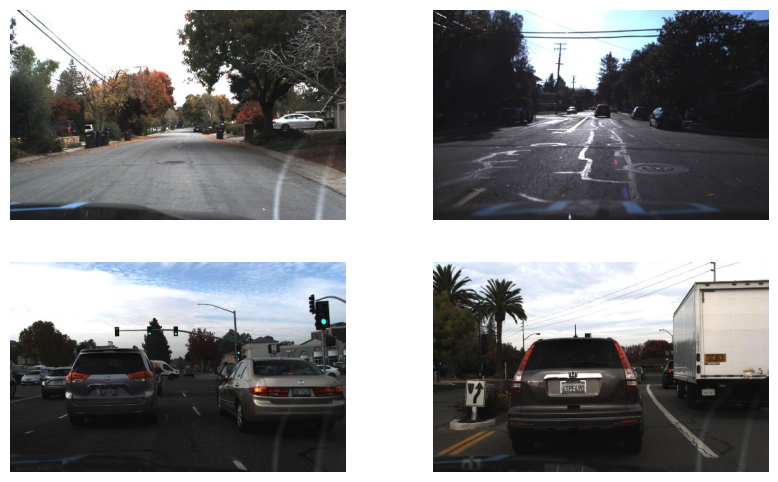

In [20]:
root_path = '/root/.cache/kagglehub/datasets/alincijov/self-driving-cars/versions/4'
image_extensions = ('.jpg')
images_data = []
for dirpath, dirnames, filenames in os.walk(root_path):
    for f in filenames:
        if f.lower().endswith(image_extensions):
            images_data.append(os.path.join(dirpath, f))

num_samples = 4

if num_samples > 0:
    random_image = random.sample(images_data, num_samples)

    plt.figure(figsize=(10,6))
    for i in range(num_samples):
        plt.subplot(2,2,i+1)
        img = cv2.imread(random_image[i])
        if img is not None:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        else:
            print(f"Could not load image: {random_image[i]}")
        plt.axis('off')
    plt.show()

In [21]:
images = []
for i in range(num_samples):
    yolo_outputs = yolo_model.predict(random_image[i])
    output = yolo_outputs[0]
    box = output.boxes
    names = output.names

    for j in range(len(box)):
        labels = names[box.cls[j].item()]
        coordinates = box.xyxy[j].tolist()
        confidence = np.round(box.conf[j].item(), 2)
        print(f'Object {j + 1} is: {labels}')
        print(f'Coordinates are: {coordinates}')
        print(f'Confidence is: {confidence}')
        print('-------')
    images.append(output.plot()[:, :, ::-1])


image 1/1 /root/.cache/kagglehub/datasets/alincijov/self-driving-cars/versions/4/images/1478901039366351032.jpg: 416x640 3 cars, 27.5ms
Speed: 1.6ms preprocess, 27.5ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 640)
Object 1 is: car
Coordinates are: [375.13604736328125, 147.63821411132812, 450.0639953613281, 174.16506958007812]
Confidence is: 0.87
-------
Object 2 is: car
Coordinates are: [261.8731689453125, 164.6787109375, 273.36358642578125, 174.98294067382812]
Confidence is: 0.45
-------
Object 3 is: car
Coordinates are: [273.3888244628906, 164.08970642089844, 287.7340393066406, 177.7923583984375]
Confidence is: 0.32
-------

image 1/1 /root/.cache/kagglehub/datasets/alincijov/self-driving-cars/versions/4/images/1479505817469978043.jpg: 416x640 7 cars, 1 truck, 26.9ms
Speed: 1.8ms preprocess, 26.9ms inference, 4.1ms postprocess per image at shape (1, 3, 416, 640)
Object 1 is: car
Coordinates are: [308.58941650390625, 138.48779296875, 356.489990234375, 169.174560546

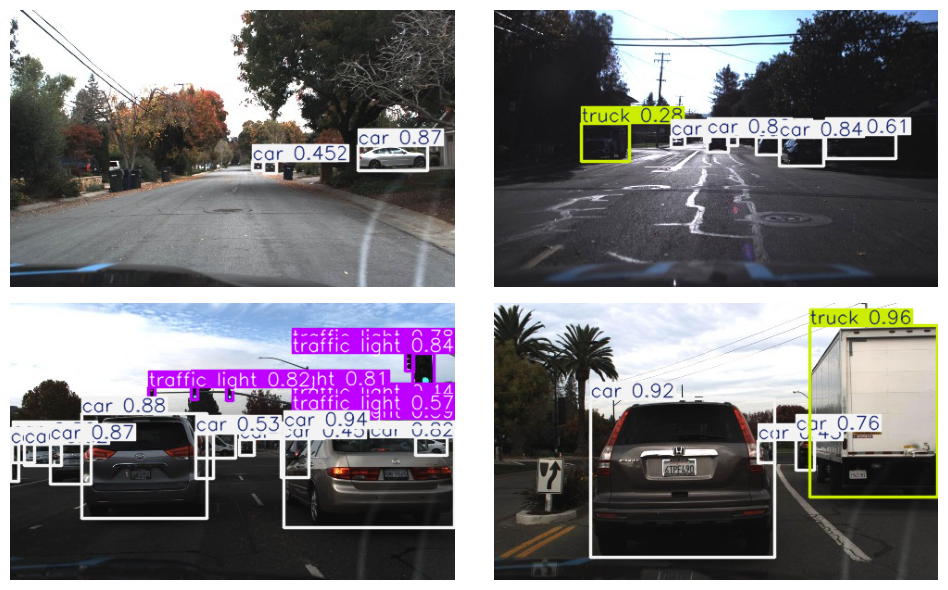

In [22]:
plt.figure(figsize=(10,6))
for i, img in enumerate(images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()